## Data collection from Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
import os
import shutil
import zipfile
from keras.preprocessing import image

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"franklinemisango","key":"1bef022636493a8636af4c4624c95cac"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                       Data Science Salaries 2023  💸                 25KB  2023-04-13 09:55:16           6146        152  1.0              
salvatorerastelli/spotify-and-youtube                       Spotify and Youtube                            9MB  2023-03-20 15:43:25          11620        405  1.0              
iammustafatz/diabetes-prediction-dataset                    Diabetes prediction dataset                  734KB  2023-04-08 06:11:45           3161         56  1.0              
shawkyelgendy/furniture-price-prediction                    Furniture Price Prediction                    81KB  202

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 99% 328M/330M [00:02<00:00, 171MB/s]
100% 330M/330M [00:02<00:00, 160MB/s]


In [ ]:
!unzip /content/face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

##Preprocessing the Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
INPUT_SIZE = [128,128]
BATCH = 32

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range = 0.2,
                                      )

training_data = training_datagen.flow_from_directory('/content/Face Mask Dataset/Train',
                                                     target_size = INPUT_SIZE,
                                                     batch_size=BATCH,
                                                     class_mode = 'binary'
                                                    )

Found 10000 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = training_datagen.flow_from_directory('/content/Face Mask Dataset/Test',
                                                     target_size = INPUT_SIZE,
                                                     batch_size=BATCH,
                                                     class_mode = 'binary'
                                                     )

Found 992 images belonging to 2 classes.


## Importing VGG16

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
vgg16 = VGG16(input_shape=INPUT_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
flatten = Flatten()(vgg16.output)
dense_1 = Dense(units=500, activation='relu')(flatten)
dense_2 = Dense(units=500, activation='relu')(dense_1)
dense_3 = Dense(units=100, activation='relu')(dense_2)
dense_4 = Dense(units=100, activation='relu')(dense_3)
dense_output = Dense(units=1, activation='sigmoid')(dense_4)

In [ ]:
model = Model(inputs=vgg16.input, outputs=dense_output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
r = model.fit_generator(
  training_data,
  validation_data=test_data,
  epochs=60, #To be Run on 60 epochs for maximum efficiency 
  steps_per_epoch=len(training_data),
  validation_steps=len(test_data)
)

<ipython-input-22-611b680412cf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/60
313/313 [==============================] - 70s 187ms/step - loss: 0.0723 - accuracy: 0.9718 - val_loss: 0.0300 - val_accuracy: 0.9909
Epoch 2/60
313/313 [==============================] - 58s 187ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0381 - val_accuracy: 0.9919
Epoch 3/60
313/313 [==============================] - 57s 182ms/step - loss: 0.0278 - accuracy: 0.9896 - val_loss: 0.0341 - val_accuracy: 0.9929
Epoch 4/60
313/313 [==============================] - 57s 182ms/step - loss: 0.0167 - accuracy: 0.9950 - val_loss: 0.0317 - val_accuracy: 0.9950
Epoch 5/60
313/313 [==============================] - 59s 187ms/step - loss: 0.0132 - accuracy: 0.9952 - val_loss: 0.0278 - val_accuracy: 0.9929
Epoch 6/60
313/313 [==============================] - 57s 181ms/step - loss: 0.0136 - accuracy: 0.9946 - val_loss: 0.0443 - val_accuracy: 0.9879
Epoch 7/60
313/313 [==============================] - 57s 182ms/step - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.0325 - val_ac

## Visualization

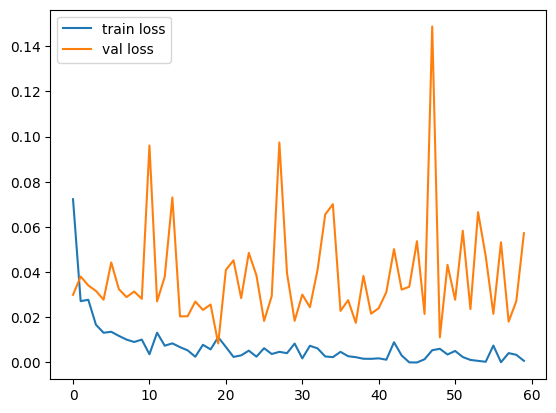

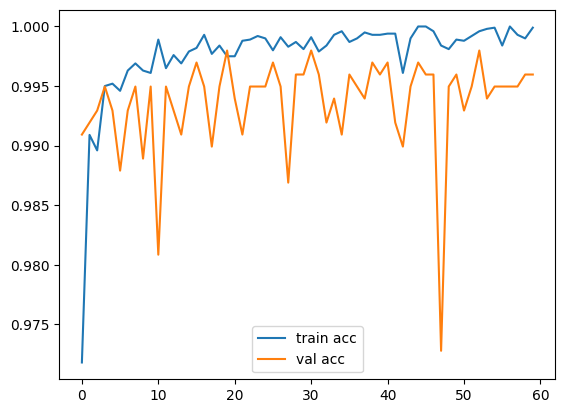

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Validating the Model

1/1 [==============================] - 1s 1s/step


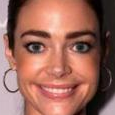

The Person above has no mask
1/1 [==============================] - 0s 19ms/step


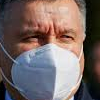

The person above has a mask


In [24]:
import numpy as np
from IPython.display import Image
from tensorflow.keras.preprocessing import image

images = ['/content/Face Mask Dataset/Validation/WithoutMask/1348.png',          
          '/content/Face Mask Dataset/Validation/WithMask/1002.png']

for image_path in images:
    test_image = image.load_img(image_path, target_size=INPUT_SIZE)
    test_image = image.img_to_array(test_image) / 255
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)[0][0]
    display(Image(image_path))
    if result < 0.5:
        print('The person above has a mask')
    else:
        print('The Person above has no mask')

In [25]:
model.save('Mask_detection.h5')
files.download('Mask_detection.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>